<a href="https://colab.research.google.com/github/veenath09/NLP/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U gensim==4.*

In [ ]:
import collections
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
negative_corpus = [
    "The croissants were stale and tasted like cardboard.",
    "The cupcakes were dry and flavorless.",
    "I found a hair in my cinnamon roll, disgusting!",
    "The bread was rock hard, couldn't even bite into it.",
    "The cookies were burnt to a crisp, terrible!",
    "The muffins were so dry, felt like I was eating sand.",
    "The pastries were overpriced and underwhelming.",
    "The bagels were doughy and undercooked.",
    "I got food poisoning from their eclairs, never going back!",
    "The donuts were stale and tasted like old oil.",
    "The pie crust was soggy and the filling tasted artificial.",
    "The scones were hard as a rock, couldn't even cut through them.",
    "The macarons were stale and had no flavor.",
    "The brownies were undercooked in the middle and burnt on the edges.",
    "The cake was dry and crumbly, a total disappointment.",
    "The breadsticks were stale and chewy, couldn't even finish one.",
    "The pretzels were too salty, it was like eating salt with a side of dough.",
    "The muffins were so dry, I needed a gallon of water just to swallow.",
    "The turnovers were filled with mushy, unripe fruit.",
    "The cheesecake was sour and tasted spoiled.",
    "The danishes were dry and lacked any real flavor.",
    "The buns were hard and tasted like they were days old.",
    "The focaccia was burnt and tasted like charcoal.",
    "The baguettes were undercooked and doughy in the middle.",
    "The pastry cream in the eclairs was curdled and disgusting.",
    "The bread rolls were dense and flavorless.",
    "The cookies were so hard, I thought I was going to break a tooth.",
    "The croissants were tiny and overpriced.",
    "The brownies were so dry, I couldn't even finish one bite.",
    "The pie crust was so tough, I couldn't cut through it with a knife.",
    "The bagels were stale and tasted like cardboard.",
    "The donuts were greasy and left a bad aftertaste.",
    "The cake was dry and lacked any real flavor.",
    "The pastries were dry and stale, tasted like they were sitting out for days.",
    "The breadsticks were burnt and inedible.",
    "The muffins were dry and crumbly, not worth the money.",
    "The cookies were so burnt, they were practically charcoal.",
    "The scones were hard as a rock, couldn't even bite into them.",
    "The croissants were soggy and undercooked.",
    "The cupcakes were dry and tasteless, waste of money.",
    "The pie was too sweet and the crust was burnt.",
    "The baguettes were stale and tasted like old flour.",
    "The donuts were greasy and left a film in my mouth.",
    "The bread was so dry, it sucked all the moisture out of my mouth.",
    "The muffins were bland and dry, couldn't even finish one.",
    "The pastries were stale and had a weird aftertaste.",
    "The brownies were so hard, I could barely cut through them.",
    "The cake was stale and tasted like it was made weeks ago.",
    "The cookies were overbaked and tasted burnt.",
    "The croissants were stale and lacked any real buttery flavor.",
    "The cupcakes were dry and crumbly, not enjoyable at all.",
    "The cinnamon rolls were dry and the icing was too sweet.",
    "The bagels were dense and tasteless.",
    "The donuts were stale and tasted like old oil.",
    "The pie crust was soggy and undercooked.",
    "The breadsticks were stale and tasted like cardboard.",
    "The muffins were dry and lacked any real flavor.",
    "The pastries were dry and tasted like they were made with old ingredients.",
    "The brownies were undercooked and gooey in the middle.",
    "The cake was dry and tasted like it was made with cheap ingredients.",
    "The cookies were so hard, I couldn't even dunk them in milk.",
    "The croissants were small and overpriced.",
    "The cupcakes were dry and crumbly, not worth the money.",
    "The cinnamon rolls were dry and lacked any real cinnamon flavor.",
    "The baguettes were stale and tasted like they were made with old yeast.",
    "The donuts were greasy and left a bad aftertaste.",
    "The bread was dry and tasted like it was left out for days.",
    "The muffins were bland and undercooked, couldn't even finish one.",
    "The pastries were stale and had a strange smell.",
    "The brownies were so dry, I needed a glass of milk just to swallow.",
    "The cake was dry and tasted like it was made with expired ingredients.",
    "The cookies were burnt and had a bitter taste.",
    "The croissants were stale and had a weird texture.",
    "The cupcakes were dry and tasteless, not worth the calories.",
    "The cinnamon rolls were dry and lacked any real flavor.",
    "The bagels were dense and chewy, like eating a rubber tire.",
    "The donuts were stale and tasted like old oil.",
    "The bread was dry and tasted like cardboard.",
    "The muffins were dry and crumbly, couldn't even finish one.",
    "The pastries were stale and had a strange aftertaste.",
    "The brownies were undercooked and gooey, not enjoyable at all.",
    "The cake was dry and tasted like it was made with low-quality ingredients.",
    "The cookies were so hard, I almost chipped a tooth.",
    "The croissants were small and overpriced, not worth it.",
    "The cupcakes were dry and lacked any real flavor.",
    "The cinnamon rolls were dry and the icing was too sugary.",
    "The baguettes were stale and tasted like they were made with old flour.",
    "The donuts were greasy and left a film in my mouth.",
    "The bread was dry and crumbled as soon as I touched it.",
    "The muffins were bland and undercooked, felt like they were raw inside.",
    "The pastries were stale and had a strange texture.",
    "The brownies were so dry, I couldn't even swallow them.",
    "The cake was dry and tasted like it was made with expired ingredients.",
    "The cookies were burnt and had a bitter aftertaste."
]

positive_corpus = [
    "The croissants were flaky and buttery, absolutely delicious!",
    "The cupcakes were moist and bursting with flavor.",
    "I loved the cinnamon rolls, they were gooey and had just the right amount of icing.",
    "The bread was fresh out of the oven and had a perfect crust.",
    "The cookies were chewy and filled with chocolate chips, divine!",
    "The muffins were moist and had a wonderful aroma.",
    "The pastries were a delightful treat, so light and fluffy.",
    "The bagels were perfectly toasted and topped with cream cheese.",
    "The eclairs were heavenly, filled with creamy custard.",
    "The donuts were light and fluffy, with a delicious glaze.",
    "The pie was absolutely scrumptious, with a flaky crust and flavorful filling.",
    "The scones were tender and crumbly, just like they should be.",
    "The macarons were delightful, with a perfect balance of flavors.",
    "The brownies were rich and fudgy, a chocolate lover's dream.",
    "The cake was moist and decadent, with creamy frosting.",
    "The breadsticks were warm and seasoned to perfection.",
    "The pretzels were soft and salty, just the way I like them.",
    "The muffins were so moist, they practically melted in my mouth.",
    "The turnovers were filled with delicious, ripe fruit.",
    "The cheesecake was creamy and luxurious, a true indulgence.",
    "The danishes were flaky and filled with sweet, fruity goodness.",
    "The buns were soft and fluffy, perfect for sandwiches.",
    "The focaccia was fresh and flavorful, with a crispy crust.",
    "The baguettes were crusty on the outside and soft on the inside, perfection!",
    "The eclairs were filled with luscious, creamy filling.",
    "The bread rolls were warm and fluffy, straight from the oven.",
    "The cookies were soft and chewy, with just the right amount of sweetness.",
    "The croissants were buttery and flaky, a true delight.",
    "The brownies were moist and chocolatey, absolutely delicious.",
    "The pie crust was perfectly golden and flaky.",
    "The bagels were chewy and flavorful, perfect with cream cheese.",
    "The donuts were light and airy, with a delicious glaze.",
    "The cake was moist and flavorful, with layers of creamy frosting.",
    "The pastries were fresh and flavorful, a real treat.",
    "The breadsticks were warm and crispy, perfect for dipping.",
    "The muffins were moist and bursting with flavor.",
    "The cookies were soft and chewy, with chunks of chocolate in every bite.",
    "The scones were tender and buttery, with a hint of sweetness.",
    "The croissants were flaky and buttery, just like in Paris.",
    "The cupcakes were moist and topped with creamy frosting.",
    "The cinnamon rolls were warm and gooey, with a generous amount of icing.",
    "The baguettes were crusty on the outside and soft on the inside.",
    "The donuts were light and fluffy, with a perfect glaze.",
    "The bread was fresh and crusty, perfect for sandwiches.",
    "The muffins were moist and flavorful, with bursts of fruit in every bite.",
    "The pastries were light and flaky, with delicious fillings.",
    "The brownies were rich and fudgy, with chunks of chocolate throughout.",
    "The cake was moist and decadent, with layers of creamy frosting.",
    "The cookies were soft and chewy, with just the right amount of sweetness.",
    "The croissants were buttery and flaky, a true indulgence.",
    "The cupcakes were moist and topped with fluffy frosting.",
    "The cinnamon rolls were warm and gooey, with a perfect balance of cinnamon and sugar.",
    "The bagels were chewy and flavorful, perfect for breakfast.",
    "The donuts were light and airy, with a delicious glaze.",
    "The bread was crusty on the outside and soft on the inside, just how I like it.",
    "The muffins were moist and packed with flavor, a real treat.",
    "The pastries were light and flaky, with delicious fillings.",
    "The brownies were rich and chocolatey, with a gooey center.",
    "The cake was moist and delicious, with layers of creamy frosting.",
    "The cookies were soft and chewy, with chunks of chocolate in every bite.",
    "The croissants were flaky and buttery, just like I remembered from France.",
    "The cupcakes were moist and topped with a generous amount of frosting.",
    "The cinnamon rolls were warm and gooey, with just the right amount of icing.",
    "The baguettes were crusty on the outside and soft on the inside, perfect for sandwiches.",
    "The donuts were light and fluffy, with a delicious glaze.",
    "The bread was fresh and crusty, perfect for dipping in olive oil.",
    "The muffins were moist and flavorful, with bursts of fruit in every bite.",
    "The pastries were light and flaky, with delicious fillings.",
    "The brownies were rich and fudgy, with a hint of espresso.",
    "The cake was moist and decadent, with layers of creamy frosting.",
    "The cookies were soft and chewy, with just the right amount of chocolate chips.",
    "The croissants were buttery and flaky, a true delight.",
    "The cupcakes were moist and topped with a creamy frosting.",
    "The cinnamon rolls were warm and gooey, with a perfect blend of spices.",
    "The bagels were chewy and flavorful, perfect with cream cheese.",
    "The donuts were light and airy, with a delicious glaze.",
    "The bread was crusty on the outside and soft on the inside, just how I like it.",
    "The muffins were moist and bursting with flavor, a real treat.",
    "The pastries were light and flaky, with delicious fillings.",
    "The brownies were rich and fudgy, with a hint of caramel.",
    "The cake was moist and delicious, with layers of creamy frosting.",
    "The cookies were soft and chewy, with just the right amount of sweetness."
]

In [ ]:
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
re_tokenizer = RegexpTokenizer(r'[a-z]\w+')

def preprocessing_text(sentence):
    sentence = sentence.lower()
    sentence = re_tokenizer.tokenize(sentence)

    tokens = []
    for token in sentence:
        if  (token not in stopwords):
          token = lemmatizer.lemmatize(token)
          tokens.append(token)

    return " ".join(tokens)

def preprocessing_corpus(corpus):
    preprocessed_corpus = []
    for sentence in corpus:
        preprocessed_corpus.append(preprocessing_text(sentence))
    return preprocessed_corpus

def make_dataset():
  corpus = positive_corpus + negative_corpus
  Y = [1]*len(positive_corpus)+[0]*len(negative_corpus)
  corpus=preprocessing_corpus(corpus)

  return corpus , Y

In [ ]:
corpus, Y = make_dataset()

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)

In [ ]:
corpus_tokens = tokenizer.texts_to_sequences(corpus)

In [ ]:
corpus_tokens[0]

[10, 11, 31, 80, 8]

In [ ]:
corpus[0], corpus_tokens[0]

('croissant flaky buttery absolutely delicious', [10, 11, 31, 80, 8])

In [ ]:
vocabulary = tokenizer.word_index
vocabulary

{'dry': 1,
 'like': 2,
 'tasted': 3,
 'moist': 4,
 'stale': 5,
 'cooky': 6,
 'muffin': 7,
 'delicious': 8,
 'pastry': 9,
 'croissant': 10,
 'flaky': 11,
 'flavor': 12,
 'perfect': 13,
 'donut': 14,
 'brownie': 15,
 'cake': 16,
 'soft': 17,
 'cinnamon': 18,
 'roll': 19,
 'bread': 20,
 'chewy': 21,
 'cupcake': 22,
 'light': 23,
 'creamy': 24,
 'frosting': 25,
 'real': 26,
 'even': 27,
 'flavorful': 28,
 'burnt': 29,
 'undercooked': 30,
 'buttery': 31,
 'gooey': 32,
 'amount': 33,
 'crust': 34,
 'bagel': 35,
 'hard': 36,
 'old': 37,
 'made': 38,
 'fluffy': 39,
 'filling': 40,
 'warm': 41,
 'baguette': 42,
 'crusty': 43,
 'bite': 44,
 'lacked': 45,
 'right': 46,
 'filled': 47,
 'chocolate': 48,
 'glaze': 49,
 'pie': 50,
 'crumbly': 51,
 'inside': 52,
 'icing': 53,
 'fresh': 54,
 'topped': 55,
 'rich': 56,
 'breadstick': 57,
 'outside': 58,
 'layer': 59,
 'finish': 60,
 'one': 61,
 'left': 62,
 'aftertaste': 63,
 'ingredient': 64,
 'treat': 65,
 'cream': 66,
 'eclair': 67,
 'scone': 68,
 'f

In [ ]:
tf.keras.utils.pad_sequences([corpus_tokens[0]], padding='post', maxlen=8)

array([[10, 11, 31, 80,  8,  0,  0,  0]], dtype=int32)

<Axes: >

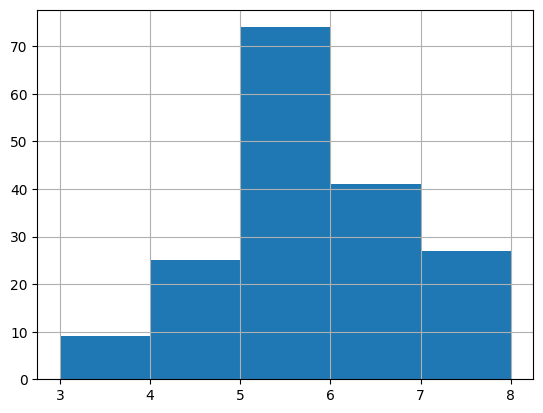

In [ ]:
token_lengths = [len(t) for t in corpus_tokens]
token_lengths = pd.Series(token_lengths)
token_lengths.hist(bins=5)

In [ ]:
pad_corpus = tf.keras.utils.pad_sequences(corpus_tokens,padding='post',maxlen=8)
pad_corpus

array([[ 10,  11,  31, ...,   0,   0,   0],
       [ 22,   4,  81, ...,   0,   0,   0],
       [142,  18,  19, ...,  33,  53,   0],
       ...,
       [ 15,   1,  27, ...,   0,   0,   0],
       [ 16,   1,   3, ..., 139,  64,   0],
       [  6,  29, 140, ...,   0,   0,   0]], dtype=int32)

In [ ]:
inputs = tf.keras.layers.Input(8,)
embeddings = tf.keras.layers.Embedding(
                                            input_dim = len(vocabulary) + 1,
                                            output_dim = 200
)
lstm_layer_01 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True))
lstm_layer_02 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))
lstm_layer_03 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
dense_layer_01 = tf.keras.layers.Dense(128,activation='relu')
dense_layer_02 = tf.keras.layers.Dense(128,activation='relu')
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [ ]:
x = embeddings(inputs)
x = lstm_layer_01(x)
x = lstm_layer_02(x)
x = lstm_layer_03(x)
x = dense_layer_01(x)
x = dense_layer_02(x)
outputs = output_layer(x)

model = tf.keras.models.Model(
                              inputs,
                              outputs
                              )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding_8 (Embedding)     (None, 8, 200)            46600     
                                                                 
 bidirectional_12 (Bidirect  (None, 8, 256)            336896    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 8, 128)            164352    
 ional)                                                          
                                                                 
 bidirectional_14 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                             

In [ ]:
model.compile(
              loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )
model.fit(
          pad_corpus,
          np.array(Y),
          batch_size = 12,
          epochs = 100
          )

Epoch 1/100
15/15 [==============================] - 16s 96ms/step - loss: 0.6793 - accuracy: 0.5455
Epoch 2/100
15/15 [==============================] - 1s 94ms/step - loss: 0.3327 - accuracy: 0.9261
Epoch 3/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0443 - accuracy: 0.9886
Epoch 4/100
15/15 [==============================] - 1s 47ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/100
15/15 [==============================] - 1s 51ms/step - loss: 4.4816e-04 - accuracy: 1.0000
Epoch 6/100
15/15 [==============================] - 1s 50ms/step - loss: 1.3223e-04 - accuracy: 1.0000
Epoch 7/100
15/15 [==============================] - 1s 49ms/step - loss: 5.8170e-05 - accuracy: 1.0000
Epoch 8/100
15/15 [==============================] - 1s 46ms/step - loss: 3.4861e-05 - accuracy: 1.0000
Epoch 9/100
15/15 [==============================] - 1s 48ms/step - loss: 2.2533e-05 - accuracy: 1.0000
Epoch 10/100
15/15 [==============================] - 1s 50ms/step - loss: 1.61

In [ ]:
n_sen = "The focaccia was burnt and tasted like charcoal."
p_sen = "The focaccia was fresh and flavorful, with a crispy crust."

In [ ]:
def predict_lstm(sen):
    sen_tokens = tokenizer.texts_to_sequences([sen])
    sen_padded = tf.keras.utils.pad_sequences(
                                              sen_tokens,
                                              padding='post',
                                              maxlen=8
                                              )
    p = float(model.predict(sen_padded).squeeze())
    p = "Negative" if p < 0.5 else "Positive"
    return p

In [ ]:
predict_lstm(p_sen)

1/1 [==============================] - 2s 2s/step


'Positive'

In [ ]:
pred = predict_lstm(corpus)
pred

1/1 [==============================] - 0s 124ms/step


'Negative'